### Assignment
In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

### Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

### Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

### Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [31]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

# no need for an open connection, 
# as we're only doing a single
engine2.dispose()

In [32]:
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [70]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized_math,winsorized_reading,winsorized_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74
1,female,group C,some college,standard,completed,69,90,88,69,87,87
2,female,group B,master's degree,standard,none,90,95,93,86,87,87
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44
4,male,group C,some college,standard,none,76,78,75,76,78,75


### Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [33]:
#lets check for unique score
print(student_df['math score'].unique())
print(student_df['reading score'].unique())
print(student_df['writing score'].unique())

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  48  42  87  49  10  34  71  37  56  41  22  81  45  36  89  47  90 100
  64  98  51  40  84  69  33  60  85  91  77  27  94  95  19  35  32  96
  97  99  15  30  23]


In [34]:
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
student_df["winsorized_math"] = winsorized_views = winsorize(student_df["math score"], (0, 0.10))
student_df["winsorized_reading"] = winsorized_views = winsorize(student_df["reading score"], (0, 0.10))
student_df["winsorized_writing"] = winsorized_views = winsorize(student_df["writing score"], (0, 0.10))

In [35]:
#lets check for unique score
print(student_df['winsorized_math'].unique())
print(student_df['winsorized_reading'].unique())
print(student_df['winsorized_writing'].unique())

[72 69 86 47 76 71 40 64 38 58 65 78 50 18 46 54 66 44 74 73 67 70 62 63
 56 81 75 57 55 53 59 82 77 33 52  0 79 39 45 60 61 41 49 30 80 42 27 43
 68 85 51 84 83 22 48 35 34 37 28 24 26 36 29 32 19 23  8]
[72 87 57 78 83 43 64 60 54 52 81 53 75 32 42 58 69 73 71 74 70 65 56 61
 84 55 44 41 85 59 17 39 80 37 63 51 49 26 68 45 47 86 34 79 66 67 76 77
 82 62 50 28 48 46 23 38 31 24 29 40]
[74 87 44 75 78 39 67 50 52 43 73 70 58 86 28 46 61 63 53 80 72 55 65 38
 82 79 83 59 57 54 68 66 62 76 48 42 49 10 34 71 37 56 41 22 81 45 36 47
 64 51 40 84 69 33 60 85 77 27 19 35 32 15 30 23]


In [36]:
#lets check for unique score
print(np.log(student_df['math score'].unique()))
print(np.log(student_df['reading score'].unique()))
print(np.log(student_df['writing score'].unique()))

[4.27666612 4.2341065  4.49980967 3.8501476  4.33073334 4.26267988
 4.47733681 3.68887945 4.15888308 3.63758616 4.06044301 4.17438727
 4.35670883 3.91202301 2.89037176 3.8286414  3.98898405 4.18965474
 3.78418963 4.30406509 4.29045944 4.20469262 4.24849524 4.12713439
 4.14313473 4.02535169 4.57471098 4.39444915 4.31748811 4.04305127
 4.00733319 3.97029191 4.07753744 4.40671925 4.34380542 3.49650756
 3.95124372       -inf 4.36944785 3.66356165 3.80666249 4.09434456
 4.11087386 3.71357207 3.8918203  3.40119738 4.38202663 3.73766962
 3.29583687 3.76120012 4.21950771 4.44265126 4.58496748 4.46590812
 3.93182563 4.59511985 4.4308168  4.51085951 4.41884061 4.48863637
 3.09104245 4.60517019 4.56434819 4.54329478 3.87120101 3.55534806
 3.52636052 4.4543473  4.52178858 3.61091791 3.33220451 3.17805383
 3.25809654 4.55387689 3.58351894 3.36729583 3.4657359  4.53259949
 2.94443898 3.13549422 2.07944154]
[4.27666612 4.49980967 4.55387689 4.04305127 4.35670883 4.41884061
 3.76120012 4.15888308 4.09

In [52]:
np.log(student_df['math score']).replace(-np.inf, np.nan, inplace = True)

In [53]:
np.log(student_df['math score']).fillna(np.log(student_df['math score']).mean(), inplace=True)

In [64]:
np.log(student_df['math score'].unique())

array([4.27666612, 4.2341065 , 4.49980967, 3.8501476 , 4.33073334,
       4.26267988, 4.47733681, 3.68887945, 4.15888308, 3.63758616,
       4.06044301, 4.17438727, 4.35670883, 3.91202301, 2.89037176,
       3.8286414 , 3.98898405, 4.18965474, 3.78418963, 4.30406509,
       4.29045944, 4.20469262, 4.24849524, 4.12713439, 4.14313473,
       4.02535169, 4.57471098, 4.39444915, 4.31748811, 4.04305127,
       4.00733319, 3.97029191, 4.07753744, 4.40671925, 4.34380542,
       3.49650756, 3.95124372,       -inf, 4.36944785, 3.66356165,
       3.80666249, 4.09434456, 4.11087386, 3.71357207, 3.8918203 ,
       3.40119738, 4.38202663, 3.73766962, 3.29583687, 3.76120012,
       4.21950771, 4.44265126, 4.58496748, 4.46590812, 3.93182563,
       4.59511985, 4.4308168 , 4.51085951, 4.41884061, 4.48863637,
       3.09104245, 4.60517019, 4.56434819, 4.54329478, 3.87120101,
       3.55534806, 3.52636052, 4.4543473 , 4.52178858, 3.61091791,
       3.33220451, 3.17805383, 3.25809654, 4.55387689, 3.58351

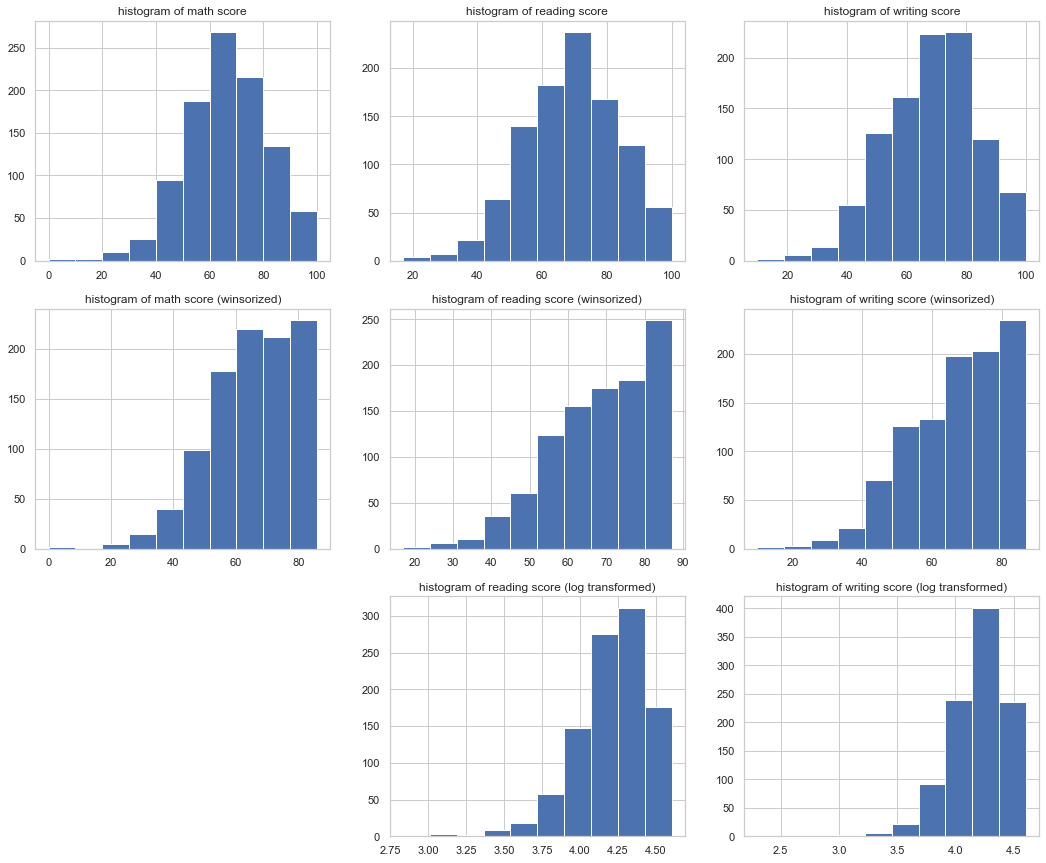

In [55]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(student_df["math score"])
plt.title("histogram of math score")

plt.subplot(3, 3, 2)
plt.hist(student_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(3, 3, 3)
plt.hist(student_df["writing score"])
plt.title("histogram of writing score")

# histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(student_df["winsorized_math"])
plt.title("histogram of math score (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(student_df["winsorized_reading"])
plt.title("histogram of reading score (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(student_df["winsorized_writing"])
plt.title("histogram of writing score (winsorized)")

# histograms of the log transformed data
#plt.subplot(3, 3, 7)
#plt.hist(np.log(student_df["math score"]))
#plt.title("histogram of math score (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(student_df["reading score"]))
plt.title("histogram of reading score (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(student_df["writing score"]))
plt.title("histogram of writing score (log transformed)")


plt.show()

original data looks more close to normal distribution than others.

Now lets test it with jarque_bera and normaltest to see the closeness of distribution:

In [56]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


Well p-value is < 0.05, which means they are not normally distributed.

We will use Box-Cox transformation:

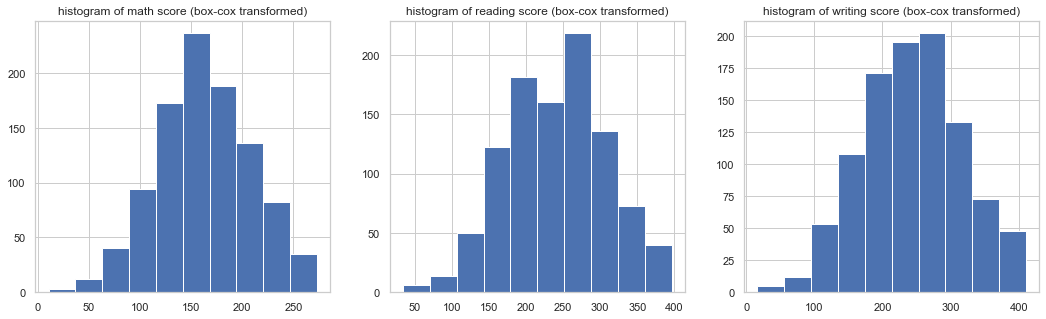

In [66]:
from scipy.stats import boxcox

math_score_boxcox,_ = boxcox(student_df[student_df["math score"]>0]['math score'])
reading_score_boxcox,_ = boxcox(student_df["reading score"])
writing_score_boxcox,_ = boxcox(student_df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [68]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


### Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


In [71]:
student_df['performance'] = (student_df['math score']+ student_df['reading score']+student_df['writing score'])/3

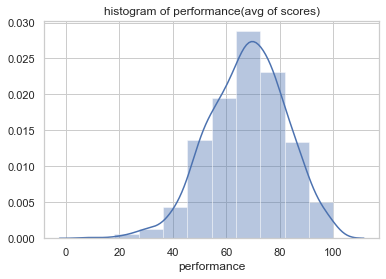

In [82]:
sns.distplot(student_df['performance'], bins = 10)
plt.title('histogram of performance(avg of scores)')
plt.show()

In [75]:

jb_stats = jarque_bera(student_df["performance"])
norm_stats = normaltest(student_df["performance"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))



Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


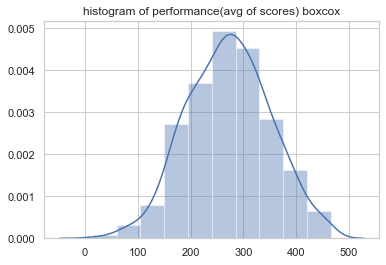

In [84]:
performance_boxcox,_ = boxcox(student_df["performance"])

sns.distplot(performance_boxcox, bins = 10)
plt.title('histogram of performance(avg of scores) boxcox')
plt.show()

In [85]:


jb_stats = jarque_bera(performance_boxcox)
norm_stats = normaltest(performance_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


### Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [86]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized_math,winsorized_reading,winsorized_writing,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,69,87,87,82.333333
2,female,group B,master's degree,standard,none,90,95,93,86,87,87,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76,78,75,76.333333


In [88]:
print(student_df.groupby("gender").mean()['performance'])
print(student_df.groupby("race/ethnicity").mean()['performance'])
print(student_df.groupby("parental level of education").mean()['performance'])
print(student_df.groupby("lunch").mean()['performance'])
print(student_df.groupby("test preparation course").mean()['performance'])

gender
female    69.569498
male      65.837483
Name: performance, dtype: float64
race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: performance, dtype: float64
parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: performance, dtype: float64
lunch
free/reduced    62.199061
standard        70.837209
Name: performance, dtype: float64
test preparation course
completed    72.669460
none         65.038941
Name: performance, dtype: float64


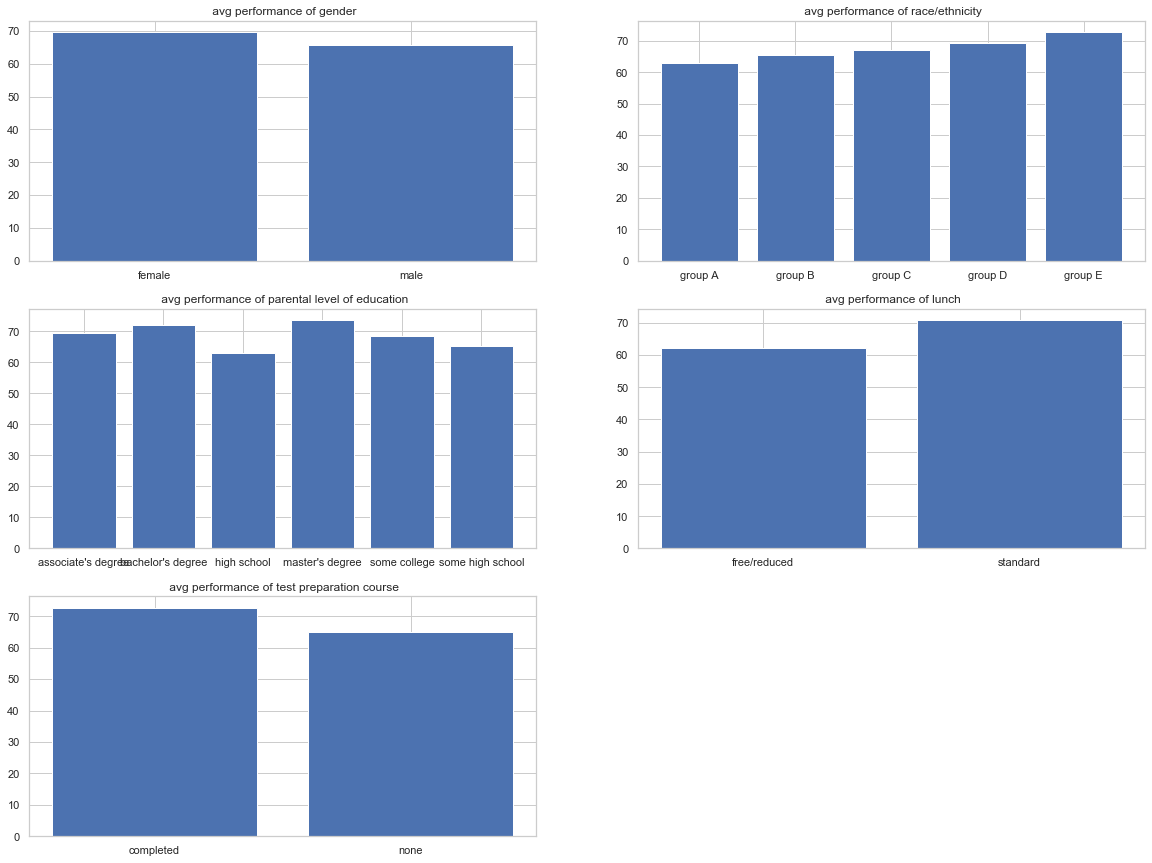

In [92]:
plt.figure(figsize = (20,15))

plt.subplot(3,2,1)
plt.bar(student_df.groupby("gender").mean()['performance'].index, student_df.groupby("gender").mean()['performance'])
plt.title(" avg performance of gender")

plt.subplot(3,2,2)
plt.bar(student_df.groupby("race/ethnicity").mean()['performance'].index, student_df.groupby("race/ethnicity").mean()['performance'])
plt.title(" avg performance of race/ethnicity")

plt.subplot(3,2,3)
plt.bar(student_df.groupby("parental level of education").mean()['performance'].index, student_df.groupby("parental level of education").mean()['performance'])
plt.title(" avg performance of parental level of education")

plt.subplot(3,2,4)
plt.bar(student_df.groupby("lunch").mean()['performance'].index, student_df.groupby("lunch").mean()['performance'])
plt.title(" avg performance of lunch")

plt.subplot(3,2,5)
plt.bar(student_df.groupby("test preparation course").mean()['performance'].index, student_df.groupby("test preparation course").mean()['performance'])
plt.title(" avg performance of test preparation course")




plt.show()

from above,
female scored higher than male in average,
group E scored higher than others.
higher education degree holder scored higher
standard lunch scored higher than reduced/free lunch
and with test preparation scored higher than without.

From the result we can use all these variables, but as the lunch dataset might not work or night need further study to see why student with free/reduced lunch scored lower than the student with standard lunch.